In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/train-titanic.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/test-titanic.csv')
combine = [train_df, test_df]

In [8]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
train_df.head()
#categorical - Survived, Sex, Embarked
# Ordinal - Pclass
#Numerical - Age, SipSP, Parch, Fare

#Alphanumerical - Cabin, Ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
train_df['SibSp'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


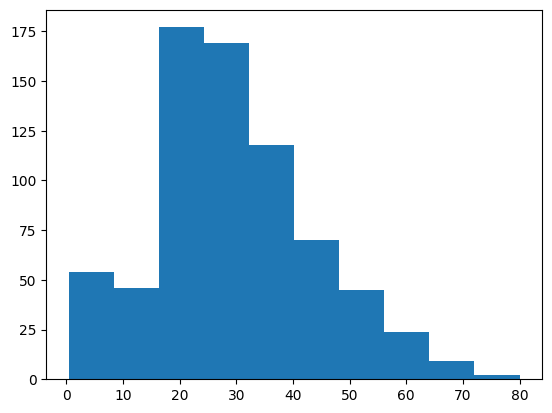

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [7]:
## fare historgram
plt.hist(train_df['Age'])
plt.show()
train_df['Age'].describe()

In [ ]:
## describe columns

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.columns
train_df['Cabin'].value_counts()
# train_df['Cabin'].value_counts()
#names, passengerId - unique
# sex - 2 values 0 & 1


,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [ ]:
## for describing columns with object datatype
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
## dropped columns -- name (not related), Cabin (highly incomplete , too many missing), Ticket (duplicates)

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
## check correlation of columns with survival
corr_matrix = train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']].corr()
corr_matrix['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<ipython-input-9-3bd93a8c6551>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, palette='muted')


<Axes: xlabel='Pclass', ylabel='Survived'>

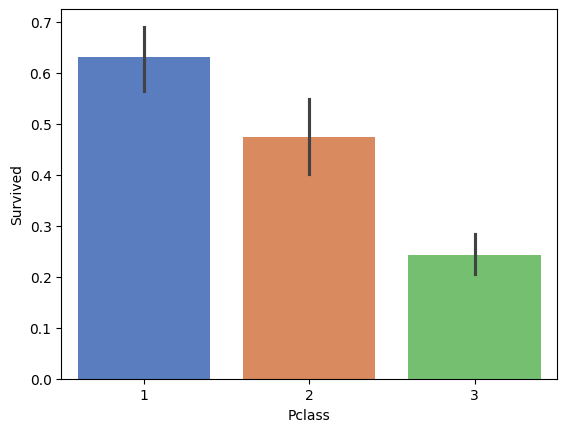

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='muted')
## Higher the Pclass, more the survival

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# woman have more survival rate

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


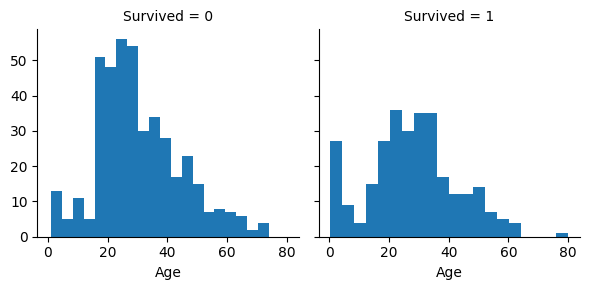

In [ ]:
## Analysing by visualizing data

## Age

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## age does play a role in determining the survival chance, we will need to fill for missing data


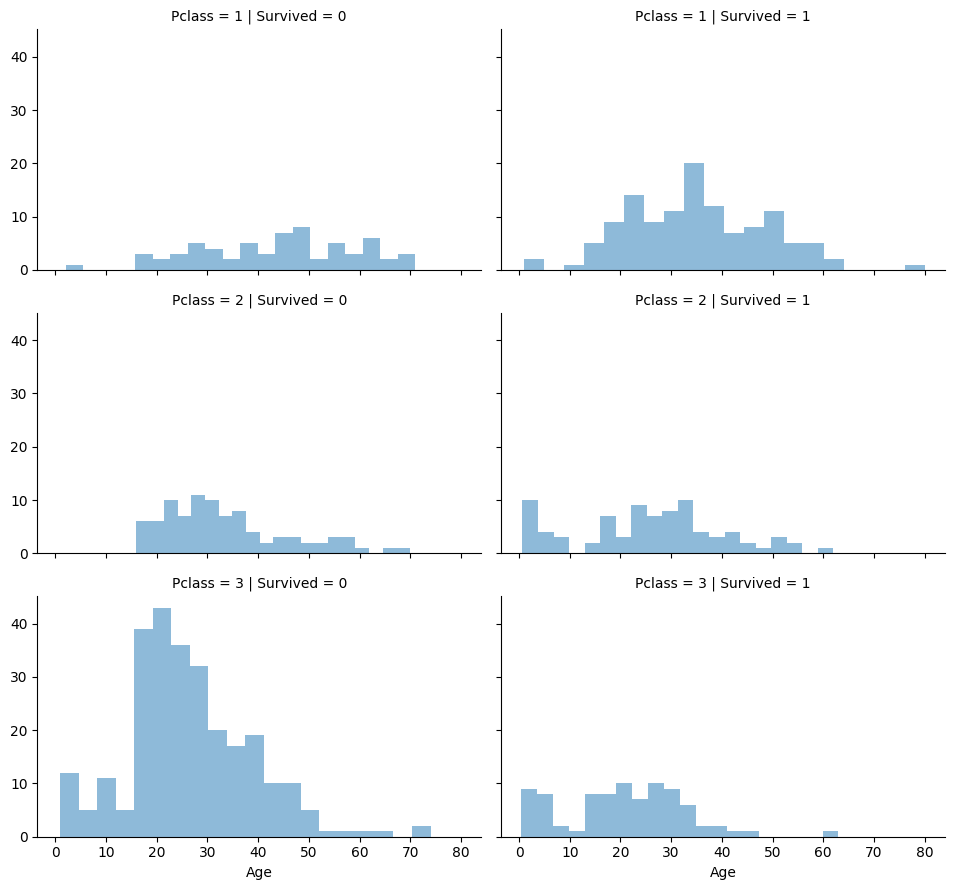

In [ ]:
# Plcass
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


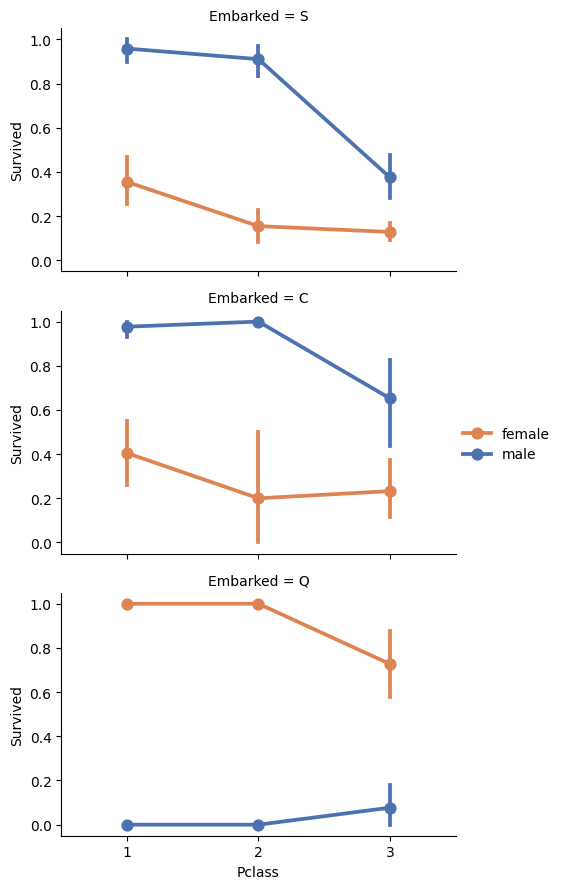

In [ ]:
## embarked

grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [10]:
## Fixing Data

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
## extracting titles from names and checking correlation with survival

for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [13]:
missing_titles = dataset['Title'].isnull().sum()
missing_titles

0

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [ ]:
dataset['Title'].value_counts()

,count
Title,
1,240
2,79
3,72
4,21
5,6


In [ ]:
train_df['Title'].value_counts()
test_df['Title'].value_counts()
train_df['Title'].isnull().sum()
test_df['Title'].isnull().sum()

0

In [16]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]


In [ ]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [24]:
## fixing for Sex

for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


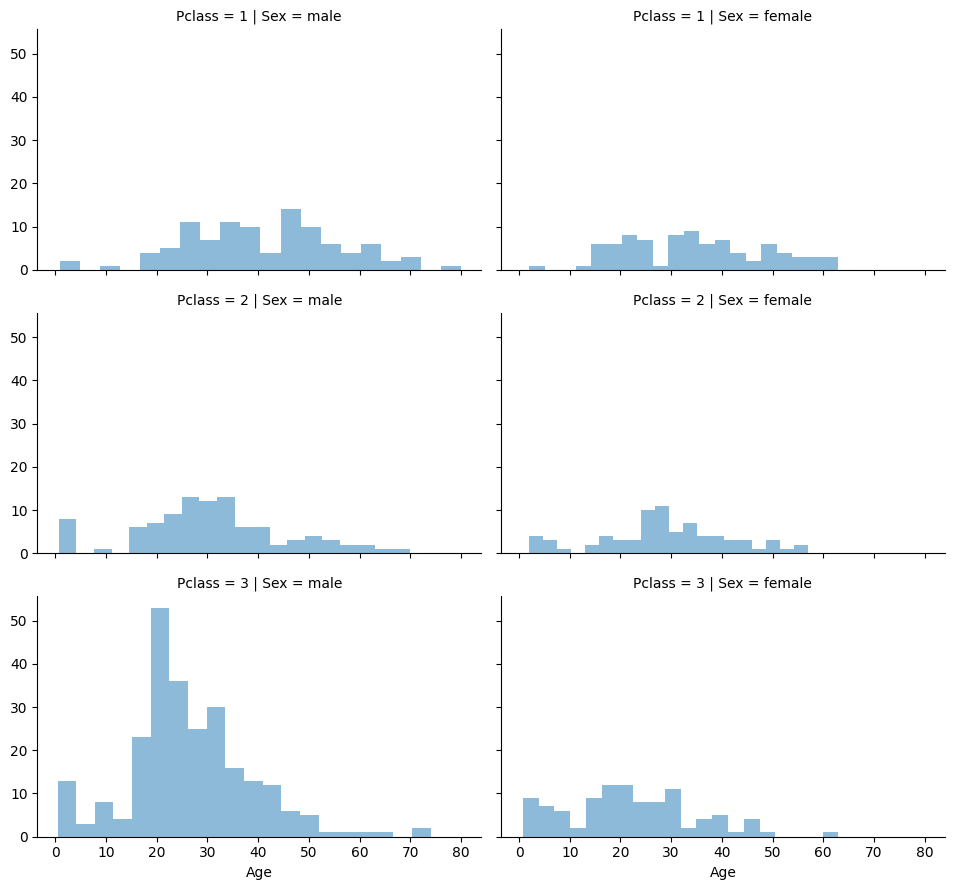

In [20]:
## filling for missing values - Age

grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [21]:
guessed_ages = np.zeros((2,3))
guessed_ages #based on Pclass and gender

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guessed_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guessed_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
822    38.0
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 101, dtype: float64
20     35.0
21     34.0
33     66.0
70     32.0
72     21.0
       ... 
848    28.0
861    21.0
864    24.0
883    28.0
886    27.0
Name: Age, Length: 99, dtype: float64
0      22.0
4      35.0
7       2.0
12     20.0
13     39.0
       ... 
876    20.0
877    19.0
881    33.0
884    25.0
890    32.0
Name: Age, Length: 253, dtype: float64
1      38.0
3      35.0
11     58.0
52     49.0
61     38.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: Age, Length: 85, dtype: float64
9      14.0
15     55.0
41     27.0
43      3.0
53     29.0
       ... 
854    44.0
865    42.0
866    27.0
874    28.0
880    25.0
Name: Age, Length: 74, dtype: float64
2      26.0
8      27.0
10      4.0
14     14.0
18     31.0
       ... 
855    18.0
858    24.0
875    15.0
882    22.0
885    39.0
Name: Age, Lengt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,Mr
1,1,1,1,38,1,0,71.2833,C,Mrs
2,1,3,1,26,0,0,7.9250,S,Miss
3,1,1,1,35,1,0,53.1000,S,Mrs
4,0,3,0,35,0,0,8.0500,S,Mr


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [27]:
train_df['Age'].describe()

,Age
count,891.000000
mean,29.072952
std,13.326339
min,0.000000
25%,21.000000
50%,26.000000
75%,36.000000
max,80.000000


In [28]:
## age bands & correlation

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



<ipython-input-28-263f2b36f265>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,Mr,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,Mrs,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,Miss,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,Mrs,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,Mr,"(32.0, 48.0]"


In [30]:
for dataset in combine:
  dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [31]:
train_df['Age'].value_counts()

,count
Age,
1,495
2,216
0,100
3,69
4,11


In [32]:
# removing ageband

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,Mr
1,1,1,1,2,1,0,71.2833,C,Mrs
2,1,3,1,1,0,0,7.9250,S,Miss
3,1,1,1,2,1,0,53.1000,S,Mrs
4,0,3,0,2,0,0,8.0500,S,Mr


In [33]:
## family size new feature

for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


In [34]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
## new feature is alone

for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,Mr,0
1,1,1,1,2,71.2833,C,Mrs,0
2,1,3,1,1,7.9250,S,Miss,1
3,1,1,1,2,53.1000,S,Mrs,0
4,0,3,0,2,8.0500,S,Mr,1


In [37]:
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [38]:
## categorical feature

train_df.info()

# embardked has 2 missing values, dropping them

freq_port =  train_df.Embarked.dropna().mode()[0]
freq_port

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Title      891 non-null    object 
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


'S'

In [39]:
for ds in combine:
  ds['Embarked'] = ds['Embarked'].fillna(freq_port)


train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,S,Mr,0,3
1,1,1,1,2,71.2833,C,Mrs,0,2
2,1,3,1,1,7.9250,S,Miss,1,3
3,1,1,1,2,53.1000,S,Mrs,0,2
4,0,3,0,2,8.0500,S,Mr,1,6


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

train_encoded = ohe.fit_transform(train_df[['Embarked', 'Title']])
test_encoded = ohe.transform(test_df[['Embarked', 'Title']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


In [47]:
encoded_columns = ohe.get_feature_names_out(['Embarked', 'Title'])

train_df[encoded_columns] = train_encoded
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,7.2500,S,Mr,0,3,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,2,71.2833,C,Mrs,0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,7.9250,S,Miss,1,3,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,2,53.1000,S,Mrs,0,2,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2,8.0500,S,Mr,1,6,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
test_df[encoded_columns] = test_encoded
print(test_df.head())

   PassengerId  Pclass  Sex  Age     Fare Embarked Title  IsAlone  Age*Class  \
0          892       3    0    2   7.8292        Q    Mr        1          6   
1          893       3    1    2   7.0000        S   Mrs        0          6   
2          894       2    0    3   9.6875        Q    Mr        1          6   
3          895       3    0    1   8.6625        S    Mr        1          3   
4          896       3    1    1  12.2875        S   Mrs        0          3   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0         1.0         0.0         0.0       1.0        0.0         0.0  
1         0.0         1.0         0.0       0.0        1.0         0.0  
2         1.0         0.0         0.0       1.0        0.0         0.0  
3         0.0         1.0         0.0       1.0        0.0         0.0  
4         0.0         1.0         0.0       0.0        1.0         0.0  


In [49]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,7.2500,S,Mr,0,3,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,2,71.2833,C,Mrs,0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,7.9250,S,Miss,1,3,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,2,53.1000,S,Mrs,0,2,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2,8.0500,S,Mr,1,6,0.0,1.0,0.0,1.0,0.0,0.0


In [56]:
train_df = train_df.drop(['Embarked', 'Title'], axis=1)
test_df = test_df.drop(['Embarked', 'Title'], axis=1)
combine = [train_df, test_df]

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,0,0,3,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,2,3,0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,1,1,3,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,2,3,0,2,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2,1,1,6,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
for ds in combine:
  ds['Embarked'] = ds['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [50]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [51]:
# fare band

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

<ipython-input-51-d1bd4afe7402>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [52]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,0,S,Mr,0,3,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,2,3,C,Mrs,0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,1,S,Miss,1,3,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,2,3,S,Mrs,0,2,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2,1,S,Mr,1,6,0.0,1.0,0.0,1.0,0.0,0.0
5,0,3,0,1,1,Q,Mr,1,3,1.0,0.0,0.0,1.0,0.0,0.0
6,0,1,0,3,3,S,Mr,1,3,0.0,1.0,0.0,1.0,0.0,0.0
7,0,3,0,0,2,S,Master,0,0,0.0,1.0,0.0,0.0,0.0,0.0
8,1,3,1,1,1,S,Mrs,0,3,0.0,1.0,0.0,0.0,1.0,0.0
9,1,2,1,0,2,C,Mrs,0,0,0.0,0.0,0.0,0.0,1.0,0.0


Modelling

In [59]:
## logistic regression

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

In [60]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,0,0,3,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,2,3,0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,1,1,1,3,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,2,3,0,2,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2,1,1,6,0.0,1.0,0.0,1.0,0.0,0.0


In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [62]:
acc_log = round(logreg.score(X_train, Y_train)*100,2) #accuracy on training dataset
acc_log

81.59

In [ ]:
logreg.coef_

array([[-1.20030854,  2.20105699, -0.46963752, -0.07166543,  0.27662781,
         0.40602724,  0.18598592, -0.05025989]])

In [63]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))

coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.032534
10,Title_Mrs,0.468064
4,IsAlone,0.368667
5,Age*Class,-0.077045
3,Fare,-0.127940
6,Embarked_Q,-0.158830
8,Title_Miss,-0.326932
2,Age,-0.349221
7,Embarked_S,-0.550235
0,Pclass,-1.228713


In [64]:
## svm

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100,2)
acc_svc


83.28

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

84.74

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100,2)
acc_gaussian

78.9

In [67]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100,2)
acc_perceptron

81.03

In [68]:
#linear svc
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81.03

In [69]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

80.13

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

86.64

In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
acc_random_forest

86.64

In [72]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.74
0,Support Vector Machines,83.28
2,Logistic Regression,81.59
5,Perceptron,81.03
7,Linear SVC,81.03
6,Stochastic Gradient Decent,80.13
4,Naive Bayes,78.90
